In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 모델 성능 평가 라이브러리


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam   # 최적화 모델

import matplotlib.pyplot as plt

In [10]:
# titanic 데이터 전처리 함수
def data_preprocessed(df):

    ## === Name의 호칭 추출 ===
    _splitted = []

    # 호칭(Mr., Mrs., Miss. 등)의 따른 결과에 차이를 고려하여, 해당 호칭을 새로운 column으로 생성
    for i in range(0, df['Name'].count()):
        # 우선적으로 이름 분리
        # 분리된 뒷 이름(index: 1)을 공백으로 분리하고 가장 처음(index: 0)이 호칭이므로, 그 값을 _splitted에 저장
        _splitted.append(((df['Name'][i].split(sep=', ')[-1]).split(sep=' '))[0])

    # 새로운 column 'Title_Name'에 저장
    df['Title_Name'] = _splitted


    ## === Ticket의 첫 이니셜 생성 ===
    df['Ticket'].astype(str)

    """
    for i in range(0, df['Ticket'].count()):
        # 임시로 분할된 티켓 이름
        _splitted = df['Ticket'][i].split(sep=' ')
        print(_splitted)
        if (len(_splitted) == 1):
            df['Ticket'][i] = 0
    """

    df['Ticket_First'] = df['Ticket'].astype(str).str[:1]

    # x_data에 대한 결측치 처리 (평균 처리)
    df['Age'] = df['Age'].fillna(np.mean(df['Age']))


    df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

    # 처리되지 않은 결측치 확인 및 해당 Row 제거 (row: 152)
    missing_indices = df[df.isna().any(axis=1)].index
    df = df.drop(index=missing_indices)

    # One-Hot-Encoding (column: 'Pclass', 'Sex', 'Title_Name', 'Ticket_First', 'Embarked') + ('Ticket_First')
    df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Title_Name', 'Ticket_First', 'Embarked']).astype(float)

    # x_data, y_data 분리
    y_data = df['Survived'].astype(float)
    x_data = df.drop(columns=['Survived'])

    # 정규화 함수 정의
    scaler = MinMaxScaler(feature_range=(0, 1))

    # x_data 정규화 (y_data는 0과 1이니까, 정규화 할 필요가 없지 않을까?)
    x_data = scaler.fit_transform(x_data)
    
    return x_data, y_data

In [11]:
# 모델 평가치 저장 리스트
model_history = []

In [12]:
## 모델 1

# 데이터 호출 및 전처리
df = pd.read_csv("./data/titanic.csv")
x_data, y_data = data_preprocessed(df)

# 데이터 분할 (train, test)
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.3,
    random_state=42,
)

# 모델 1 구성
def model_1():
    model = Sequential()

    # 은닉층: Relu, 출력층: sigmoid
    print(f"imput_dim: {x_data.shape[1]}")  # input_dim: x_data의 열의 수 (1번 인덱스)
    model.add(Dense(1, input_dim=x_data.shape[1], activation='sigmoid'))

    # 최적화 모델 설정
    optimizer = SGD(learning_rate=0.001)

    model.summary()

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model

# 모델 1 불러오기
model = model_1()

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=8,
    verbose=1
)

# model 평가
score = model.evaluate(x_test, y_test)

# 모델의 accuray, loss 기록 값 저장
model_history.append({
    "id": 1,
    "accuracy": history.history['accuracy'],
    "loss": history.history['loss'],
})

imput_dim: 35


/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.6118 
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.6117
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.5908
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.5751 
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.5716
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.5943
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.5544 
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.5520
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.5489
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.5552
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.5433
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [13]:
## 모델 2

# 데이터 호출 및 전처리
df = pd.read_csv("./data/titanic.csv")
x_data, y_data = data_preprocessed(df)

# 데이터 분할 (train, test)
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.3,
    random_state=42,
)

# train_data 데이터 분할 (train, validation)
x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.125,
    random_state=42,
)

# 모델 2 구성
def model_2():
    model = Sequential()

    # 은닉층: Relu, 출력층: sigmoid
    print(f"imput_dim: {x_data.shape[1]}")  # input_dim: x_data의 열의 수 (1번 인덱스)
    model.add(Dense(32, input_dim=x_data.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # 최적화 모델 설정
    optimizer = SGD(learning_rate=0.001)

    model.summary()

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

# 모델 2 불러오기
model = model_2()

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=8,
    validation_data=(x_val, y_val),
    verbose=1
)

# model 평가
score = model.evaluate(x_test, y_test)

# 모델의 accuray, loss 기록 값 저장
model_history.append({
    "id": 2,
    "accuracy": history.history['accuracy'],
    "loss": history.history['loss'],
})

imput_dim: 35


/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5028 - loss: 0.6752 - val_accuracy: 0.5405 - val_loss: 0.6840
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5555 - loss: 0.6756 - val_accuracy: 0.5676 - val_loss: 0.6802
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.6706 - val_accuracy: 0.5676 - val_loss: 0.6766
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5619 - loss: 0.6688 - val_accuracy: 0.6216 - val_loss: 0.6733
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6316 - loss: 0.6642 - val_accuracy: 0.6757 - val_loss: 0.6703
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7456 - loss: 0.6462 - val_accuracy: 0.6486 - val_loss: 0.6673
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6804 - loss: 0.6549 - val_accuracy: 0.6486 - val_loss: 0.6645
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7399 - loss: 0.6447 - val_accuracy: 0.6757 - v

In [14]:
## 모델 3

# 데이터 호출 및 전처리
df = pd.read_csv("./data/titanic.csv")
x_data, y_data = data_preprocessed(df)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5개의 폴드로 나누기

def model_3():
    # 밖에 모델을 설정하더라도, 계속 재사용 가능함
    model = Sequential([
        Dense(32, input_dim=x_data.shape[1]),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(16),
        BatchNormalization(),
        Activation('relu'),

        Dense(1, activation='sigmoid')
    ])

    # 최적화 모델 설정
    optimizer = SGD(learning_rate=0.001)

    # 모델 컴파일
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model



kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5개의 폴드로 나누기

# 평가 저장용 리스트
accuracies = [] #정확도 평가
precisions = [] #정밀도 평가
recalls = []    #재현율 평가
f1_scores = []  #조화 평균?

# 각 폴드 시행 별 해당 폴드의 accuray와 lose의 epoch 당 기록을 저장할 리스트
kfold_accuray = []
kfold_loss = []

for train_index, val_index in kf.split(x_data):

    # 훈련과 검증 데이터 분리
    x_train, x_val = pd.DataFrame(x_data).iloc[train_index], pd.DataFrame(x_data).iloc[val_index]
    y_train, y_val = pd.DataFrame(y_data).iloc[train_index], pd.DataFrame(y_data).iloc[val_index]

    # 모델 3 불러오기
    model = model_3()

    # 모델 훈련
    history = model.fit(
        x_train, 
        y_train,
        epochs=100, 
        batch_size=32,
        validation_data=(x_val, y_val), 
        verbose=1
    )
    y_pred = (model.predict(x_val) > 0.5).astype(int)

    # 모델 성능 평가
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    kfold_accuray.append(history.history['accuracy'])
    kfold_loss.append(history.history['loss'])

def print_avg():
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    print(f"\n모델 평균 성능:")
    print(f"평균 정확도: {avg_accuracy:.4f}")
    print(f"평균 Precision: {avg_precision:.4f}")
    print(f"평균 Recall: {avg_recall:.4f}")
    print(f"평균 F1-Score: {avg_f1:.4f}")

# 각 결과 값(accuracy, loss)을 DataFrame으로 변환하고, 각 열 별 평균값으로 변환
kfold_accuray = pd.DataFrame(kfold_accuray)
kfold_loss = pd.DataFrame(kfold_loss)

model_history.append({
    "id": 3,
    "accuracy": kfold_accuray.mean(),
    "loss": kfold_loss.mean()
})

# 평균 성능 출력
print_avg()

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3659 - loss: 1.0387 - val_accuracy: 0.4048 - val_loss: 0.6755
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3475 - loss: 1.0330 - val_accuracy: 0.4167 - val_loss: 0.6778
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3633 - loss: 0.9473 - val_accuracy: 0.4286 - val_loss: 0.6792
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3715 - loss: 1.0024 - val_accuracy: 0.4286 - val_loss: 0.6798
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3543 - loss: 1.0341 - val_accuracy: 0.4286 - val_loss: 0.6813
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3715 - loss: 0.9631 - val_accuracy: 0.4167 - val_loss: 0.6825
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3675 - loss: 0.9658 - val_accuracy: 0.4167 - val_loss: 0.6834
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3627 - loss: 0.9486 - val_accuracy: 0.4048 - 

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4086 - loss: 0.9233 - val_accuracy: 0.2738 - val_loss: 0.7594
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4555 - loss: 0.8767 - val_accuracy: 0.2619 - val_loss: 0.7410
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4444 - loss: 0.8375 - val_accuracy: 0.3571 - val_loss: 0.7248
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4875 - loss: 0.8043 - val_accuracy: 0.4643 - val_loss: 0.7083
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5146 - loss: 0.8054 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5034 - loss: 0.8067 - val_accuracy: 0.5357 - val_loss: 0.6807
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5006 - loss: 0.7980 - val_accuracy: 0.5714 - val_loss: 0.6663
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5019 - loss: 0.7954 - val_accuracy: 0.7143 - val_los

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5617 - loss: 0.7733 - val_accuracy: 0.2169 - val_loss: 0.7240
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6051 - loss: 0.7320 - val_accuracy: 0.4096 - val_loss: 0.7228
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6044 - loss: 0.7441 - val_accuracy: 0.5181 - val_loss: 0.7231
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5833 - loss: 0.7568 - val_accuracy: 0.5783 - val_loss: 0.7249
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6388 - loss: 0.6944 - val_accuracy: 0.5904 - val_loss: 0.7252
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6452 - loss: 0.6830 - val_accuracy: 0.6506 - val_loss: 0.7244
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6659 - loss: 0.6458 - val_accuracy: 0.6506 - val_loss: 0.7217
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6863 - loss: 0.6595 - val_accuracy: 0.6506 - val_loss: 0.

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4294 - loss: 1.0299 - val_accuracy: 0.2169 - val_loss: 0.8183
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4416 - loss: 1.0037 - val_accuracy: 0.2289 - val_loss: 0.8252
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3786 - loss: 1.0279 - val_accuracy: 0.2289 - val_loss: 0.8327
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3823 - loss: 0.9562 - val_accuracy: 0.2289 - val_loss: 0.8363
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4119 - loss: 1.0237 - val_accuracy: 0.2530 - val_loss: 0.8388
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4068 - loss: 1.0022 - val_accuracy: 0.2651 - val_loss: 0.8409
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4400 - loss: 0.9793 - val_accuracy: 0.2651 - val_loss: 0.8409
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4238 - loss: 1.0116 - val_accuracy: 0.2771 - val_loss: 0

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4124 - loss: 0.7727 - val_accuracy: 0.6386 - val_loss: 0.6706
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3792 - loss: 0.7992 - val_accuracy: 0.6506 - val_loss: 0.6688
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3955 - loss: 0.7968 - val_accuracy: 0.6386 - val_loss: 0.6682
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4179 - loss: 0.7864 - val_accuracy: 0.6506 - val_loss: 0.6670
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4549 - loss: 0.7500 - val_accuracy: 0.6506 - val_loss: 0.6669
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4325 - loss: 0.7619 - val_accuracy: 0.6506 - val_loss: 0.6668
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4302 - loss: 0.7634 - val_accuracy: 0.6506 - val_loss: 0.6672
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4342 - loss: 0.7458 - val_accuracy: 0.6627 - val_loss: 0

In [15]:
## 모델 앙상블 구축
from sklearn.ensemble import VotingClassifier
from scikeras.wrappers import KerasClassifier

# 학습 데이터 새로 불러오기
df = pd.read_csv("./data/titanic.csv")
x_data, y_data = data_preprocessed(df)

# 데이터 분할 (train, test)
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.3,
    random_state=42,
)

# Keras 식별모델로 래핑 (keras의 Sequential 모델을 직접적으로 앙상블 보팅 모델에 적용할 수 없다.)
model_1 = KerasClassifier(model=model_1, epochs=100, batch_size=8, verbose=0)
model_2 = KerasClassifier(model=model_2, epochs=100, batch_size=8, verbose=0)
model_3 = KerasClassifier(model=model_3, epochs=100, batch_size=8, verbose=0)

# 앙상블 모델 구성 (사전에 학습된 모델 3가지를 결합)
voting_model = VotingClassifier(
    estimators=[
        ('model_1', model_1),
        ('model_2', model_2),
        ('model_3', model_3),
    ],
    voting='hard'
)

voting_model.fit(x_train, y_train)

# voting_model의 history를 확인 (history는 모델을 fit 할 때마다 갱신됨)
# print(history)

# 모델의 accuray, loss 기록 값 저장
model_history.append({
    "id": 4,
    "accuracy": history.history['accuracy'],
    "loss": history.history['loss'],
})

imput_dim: 35


/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

imput_dim: 35


/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 32)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

/home/kimdowne/temp/HW5/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Figure size 640x480 with 0 Axes>

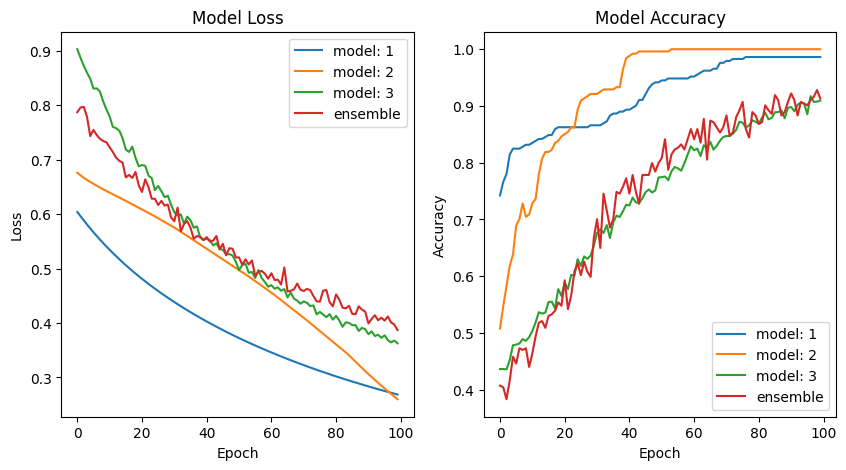

In [16]:
# 해당 모델의 결과 (loss, accuracy) 그래프로 나타내기
plt.clf()
plt.figure(figsize=(10,5))

# Loss 그래프
plt.subplot(121)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

for mh in model_history:           # 각 모델(id: 1, 2, 3)의 loss를 그래프에 그려냄
    plt.plot(mh['loss'])           # 앞서 fit()한 모델의 기록을 담은 history 변수의 'loss' 데이터
plt.legend(['model: 1', 'model: 2', 'model: 3', 'ensemble'], loc='upper right')    # 해당 곡선(요소)에 대한 설명


# Accuracy 그래프
plt.subplot(122)
plt.title('Model Accuracy')     # 앞서 fit()한 모델의 기록을 담은 history 변수의 'accuracy' 데이터
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

for mh in model_history:
    plt.plot(mh['accuracy'])    # 각 모델(id: 1, 2, 3)의 accuracy를 그래프에 그려냄
plt.legend(['model: 1', 'model: 2', 'model: 3', 'ensemble'], loc='lower right')

plt.show()